In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.figsize':(11,7), 'figure.dpi':100})


In [37]:
df = pd.read_csv('integratedData.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",nm0721526,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",nm0721526,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",nm0005690,\N


In [39]:
(df == '\\N').sum()

tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 1
startYear         1200932
endYear           8949472
runtimeMinutes    6608533
genres             411434
directors         3863571
writers           4393667
dtype: int64

In [40]:
# Drop endYear column
df.drop("endYear", axis=1, inplace=True)

In [41]:
# Drop endYear column
df.drop("runtimeMinutes", axis=1, inplace=True)

In [42]:
# Drop missing rows of director column
df = df[df['directors'] != '\\N']

In [43]:
print("Total rows: ", len(df))
print((df == '\\N').sum())

Total rows:  5179085
tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear         688130
genres            208046
directors              0
writers          1194623
dtype: int64


In [44]:
# Get mean year
int(df['startYear'][df['startYear'] != '\\N'].astype(int).mean())

2003

In [45]:
# Replace null with mean year
df['startYear'][df['startYear'] == '\\N'] = 2003

In [46]:
df['genres'].value_counts()

Drama                        805591
Comedy                       420550
Drama,Romance                289559
Documentary                  246112
\N                           208046
                              ...  
Crime,Film-Noir,Sport             1
Family,Game-Show,Musical          1
Animation,Sport,Thriller          1
Documentary,Mystery,Sport         1
Comedy,Fantasy,Western            1
Name: genres, Length: 2253, dtype: int64

In [47]:
# Replace missing values as Drama genre
df['genres'][df['genres'] == "\\N"] = 'Drama'

In [48]:
# Double check NaN value
df.isnull().sum()

tconst           0
titleType        0
primaryTitle     0
originalTitle    0
isAdult          0
startYear        0
genres           4
directors        0
writers          0
dtype: int64

In [49]:
df['genres'][df['genres'].isnull()] = 'Drama'

# Remove unesscessary data

In [50]:
df['writers'].value_counts()

\N                                                             1194623
nm6352729                                                        12267
nm1271987,nm1667629,nm4390665,nm3089072,nm1956179,nm1335533       9764
nm1203430                                                         9569
nm7370686                                                         7623
                                                                ...   
nm6051371,nm5713563                                                  1
nm1703707,nm1706570,nm1514345,nm1318349                              1
nm3771227,nm0170030,nm2017988,nm1943306,nm1240647                    1
nm0903275                                                            1
nm0302175,nm0302143                                                  1
Name: writers, Length: 1127905, dtype: int64

In [51]:
# Drop writers column
df.drop("writers", axis=1, inplace=True)

In [52]:
# Check and drop duplicated row after removing unique column
df[df.drop('tconst', axis=1).duplicated()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,genres,directors
3152,tt0003181,short,Mutt and Jeff,Mutt and Jeff,0,1913,"Animation,Short",nm0279404
3153,tt0003182,short,Mutt and Jeff,Mutt and Jeff,0,1913,"Animation,Short",nm0279404
3154,tt0003183,short,Mutt and Jeff,Mutt and Jeff,0,1913,"Animation,Short",nm0279404
3155,tt0003184,short,Mutt and Jeff,Mutt and Jeff,0,1913,"Animation,Short",nm0279404
3156,tt0003185,short,Mutt and Jeff,Mutt and Jeff,0,1913,"Animation,Short",nm0279404
...,...,...,...,...,...,...,...,...
9040878,tt9912984,tvEpisode,Episode #1.57,Episode #1.57,0,2005,Drama,nm0062879
9040879,tt9912986,tvEpisode,Episode #1.59,Episode #1.59,0,2005,Drama,nm0062879
9040880,tt9912988,tvEpisode,Episode #1.58,Episode #1.58,0,2005,Drama,nm0062879
9040881,tt9912990,tvEpisode,Episode #1.60,Episode #1.60,0,2005,Drama,nm0062879


In [53]:
df = df.loc[~df.drop('tconst', axis=1).duplicated()]

In [54]:
# Drop primaryTitle column
df.drop("primaryTitle", axis=1, inplace=True)
# Drop originalTitle column
df.drop("originalTitle", axis=1, inplace=True)

In [55]:
df.shape

(5137452, 6)

In [56]:
df.head()

,tconst,titleType,isAdult,startYear,genres,directors
0,tt0000001,short,0,1894,"Documentary,Short",nm0005690
1,tt0000002,short,0,1892,"Animation,Short",nm0721526
2,tt0000003,short,0,1892,"Animation,Comedy,Romance",nm0721526
3,tt0000004,short,0,1892,"Animation,Short",nm0721526
4,tt0000005,short,0,1893,"Comedy,Short",nm0005690


# OUTLINER

In [57]:
# Convert startYear data to interger type
df['startYear'] = df['startYear'].astype(int) 
# Check for startYear
df['startYear'].describe()

count    5.137452e+06
mean     2.003309e+03
std      1.937188e+01
min      1.874000e+03
25%      2.001000e+03
50%      2.009000e+03
75%      2.016000e+03
max      2.029000e+03
Name: startYear, dtype: float64

(array([6.600000e+01, 3.846000e+03, 5.057600e+04, 4.310400e+04,
        4.287300e+04, 1.547210e+05, 3.230700e+05, 4.637250e+05,
        2.260872e+06, 1.794599e+06]),
 array([1874. , 1889.5, 1905. , 1920.5, 1936. , 1951.5, 1967. , 1982.5,
        1998. , 2013.5, 2029. ]),
 <BarContainer object of 10 artists>)

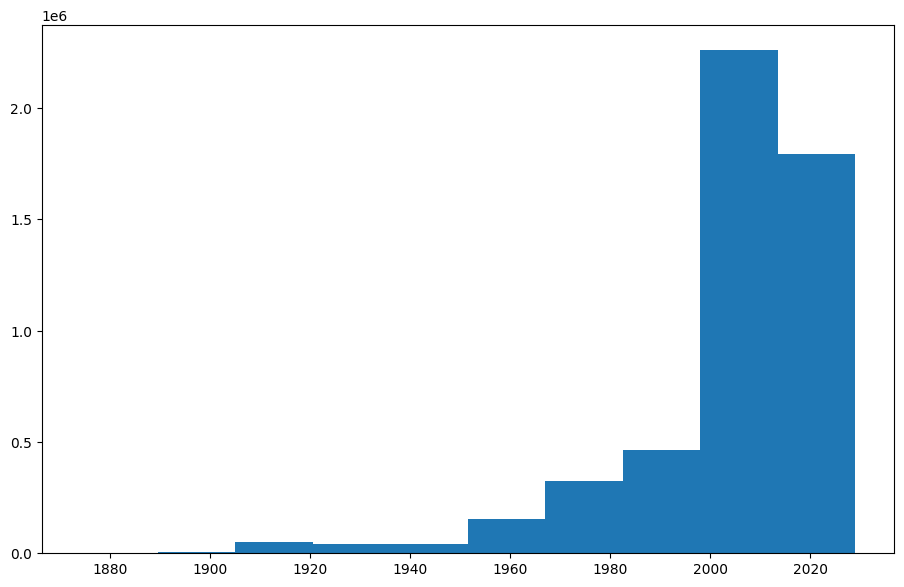

In [58]:
plt.hist(df['startYear'])

In [59]:
df['startYear'].value_counts()[df['startYear'].value_counts() == 1]

1874    1
1885    1
1883    1
2029    1
Name: startYear, dtype: int64

In [60]:
# Remove the outliner year
df = df.loc[(df['startYear'] != 2029) &
        (df['startYear'] != 1885) &
   (df['startYear'] != 1874) &
   (df['startYear'] != 1883)]

In [61]:
df['genres'].value_counts()

Drama                           989265
Comedy                          417907
Drama,Romance                   287211
Documentary                     245772
Drama,Short                     161249
                                 ...  
Talk-Show,War                        1
Adventure,Biography,Thriller         1
Animation,Crime,Music                1
Family,Reality-TV,Romance            1
Mystery,News,Sci-Fi                  1
Name: genres, Length: 2252, dtype: int64

In [62]:
df['directors'].value_counts()

nm1203430              10563
nm1409127              10354
nm13220986              8024
nm0022750               6326
nm0565214               5964
                       ...  
nm4602011                  1
nm5623611                  1
nm6596135,nm6596134        1
nm5148858                  1
nm0302175,nm0302143        1
Name: directors, Length: 865039, dtype: int64

#  Error data

<AxesSubplot:xlabel='isAdult', ylabel='count'>

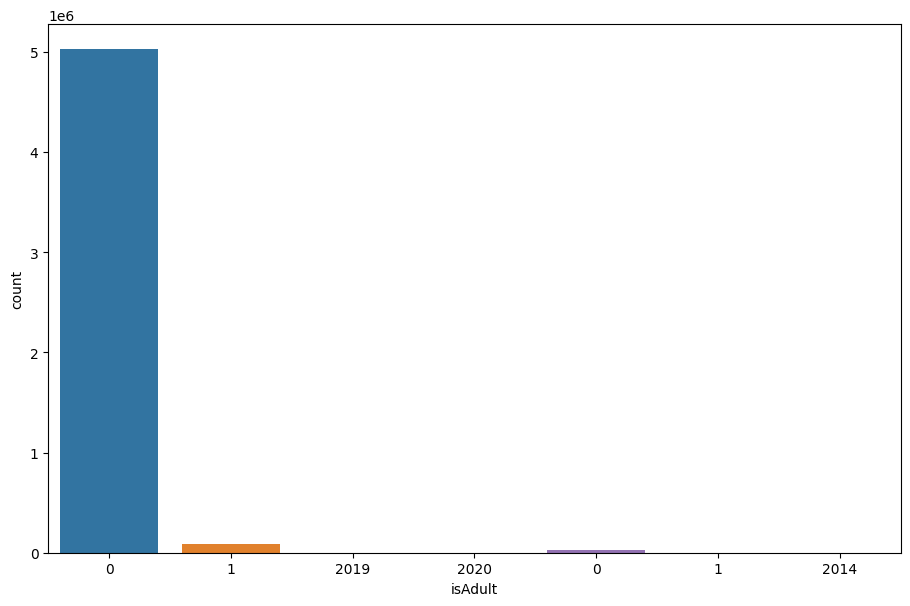

In [63]:
sns.countplot(x=df['isAdult'])

In [64]:
# Convert '0' string into 0 interger
df.loc[df['isAdult'] == '0', 'isAdult'] = \
df.loc[df['isAdult'] == '0', 'isAdult'].astype(int)

In [65]:
# Convert '1' string into 1 interger
df.loc[df['isAdult'] == '1', 'isAdult'] = \
df.loc[df['isAdult'] == '1', 'isAdult'].astype(int)

In [66]:
df = df.loc[df['isAdult'] != 2020]

In [67]:
df = df.loc[df['isAdult'] != 2014]

In [68]:
df = df.loc[df['isAdult'] != 2019]

<AxesSubplot:xlabel='isAdult', ylabel='count'>

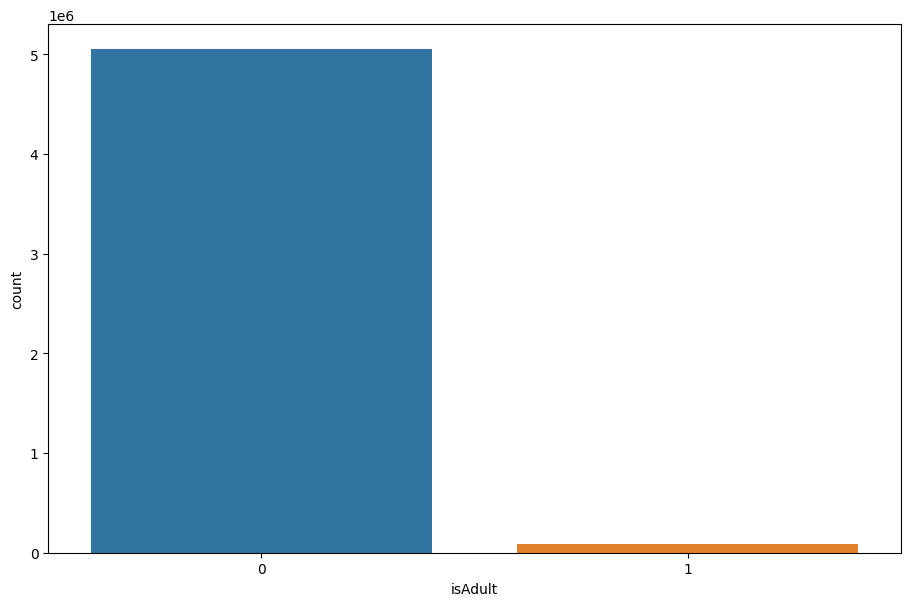

In [69]:
sns.countplot(x=df['isAdult'])

In [70]:
# Only movie type data is taken
df = df.loc[df['titleType'] == 'movie']

In [72]:
# Drop titletype column 
df.drop("titleType", axis=1, inplace=True)

In [37]:
df.to_csv('cleanedData.csv', index=False)